In [12]:
# !pip uninstall shapely
# !pip install shapely --no-binary shapely

# !pip install cartopy

# Tutorial: https://github.com/groundhogday321/python-cartopy/blob/master/Python%20Cartopy.ipynb

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.io.shapereader as shpreader
import cartopy.io.img_tiles as cimgt
import matplotlib.pyplot as plt
import cartopy.mpl.geoaxes
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
%matplotlib inline
import numpy as np
import pandas as pd
from vega_datasets import data as vds

In [10]:
airports = vds.airports()
airports = airports.iloc[:10]
airports.head()

,iata,name,city,state,country,latitude,longitude
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944


In [14]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')
folder_path = "/content/drive/My Drive/Data Visualisation/"

earthquakes_data = pd.read_csv(folder_path + "eartquakes_Romania.csv")
earthquakes_data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2017-03-08T13:43:13.070Z,45.6583,26.4629,148.97,4.1,mb,NaN,41.0,0.259,0.76,us,us100087pk,2017-04-20T10:53:57.224Z,"19km N of Gura Teghii, Romania",earthquake,3.2,3.9,0.127,17.0,reviewed,us,us
1,2017-02-08T15:08:20.550Z,45.5187,26.2594,127.01,4.7,mb,NaN,19.0,0.222,1.10,us,us20008ii5,2017-03-01T06:16:37.044Z,"11km NNW of Nehoiu, Romania",earthquake,6.6,5.4,0.045,152.0,reviewed,us,us
2,2017-02-08T09:52:06.090Z,45.7360,26.6616,129.27,4.4,mb,NaN,48.0,0.559,1.23,us,us20008ifq,2017-03-05T08:24:32.472Z,"4km WNW of Nereju, Romania",earthquake,6.4,5.4,0.148,13.0,reviewed,us,us
3,2016-12-27T23:20:56.100Z,45.7144,26.5283,97.00,5.6,mww,NaN,14.0,0.466,0.80,us,us10007n3r,2017-03-23T22:52:05.040Z,"14km W of Nereju, Romania",earthquake,4.3,1.8,NaN,NaN,reviewed,us,us
4,2016-10-31T11:59:49.800Z,45.8700,26.7800,90.00,4.1,mb,NaN,NaN,NaN,1.43,us,us1000738i,2017-01-24T02:02:12.040Z,"2km SW of Matacina, Romania",earthquake,6.7,6.4,0.157,11.0,reviewed,buc,us


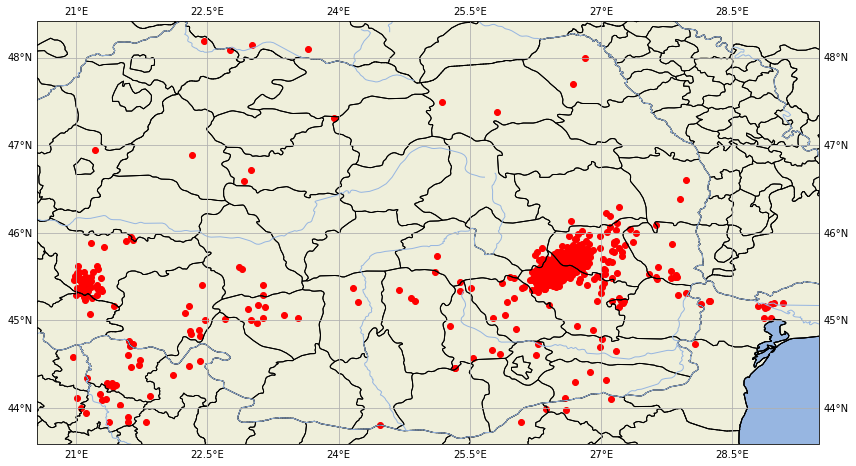

In [21]:
fig = plt.figure(figsize=(14, 14))
m6 = plt.axes(projection=ccrs.PlateCarree())    
m6.add_feature(cfeature.STATES)
m6.add_feature(cfeature.LAND)
m6.add_feature(cfeature.OCEAN)
m6.add_feature(cfeature.COASTLINE)
m6.add_feature(cfeature.BORDERS, linestyle=':')
m6.add_feature(cfeature.LAKES, alpha=0.5)
m6.add_feature(cfeature.RIVERS)
grid_lines = m6.gridlines(draw_labels=True)
grid_lines.xformatter = LONGITUDE_FORMATTER
grid_lines.yformatter = LATITUDE_FORMATTER
m6.coastlines()
for i in earthquakes_data.itertuples():
    m6.scatter(i.longitude, i.latitude, color='red', transform=ccrs.PlateCarree())
    plt.text(i.longitude, i.latitude, "")